<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [143]:
# Installing the libraries with the specified version.
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3  xgboost==2.0.3 -q --user


In [144]:
!pip install -U imbalanced-learn

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [145]:
# Mount drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#complete the code to load the dataset
ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Churn.csv')

## Data Overview

### View the first and last 5 rows of the dataset.

In [146]:
# let's view the first 5 rows of the data
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [147]:
# let's view the last 5 rows of the data
ds.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [148]:
# Checking the number of rows and columns in the training data and data types
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Observations

*   There are 10000 rows and 13 columns
*   Data types of colums are int, float and object

### Checking the Statistical Summary

In [149]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


### Checking for Missing Values

In [150]:
# let's check for missing values in the data
ds.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Observations

*  The dataframe does not contain any missing values



### Checking for unique values for each of the column

In [11]:
ds.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Observations

*   Geography had 3 unique values
*   Tenure have 11 unique values



In [12]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore
Few outliers on the lower end. Follows almot normal distribution
Mean credit score is around 650.

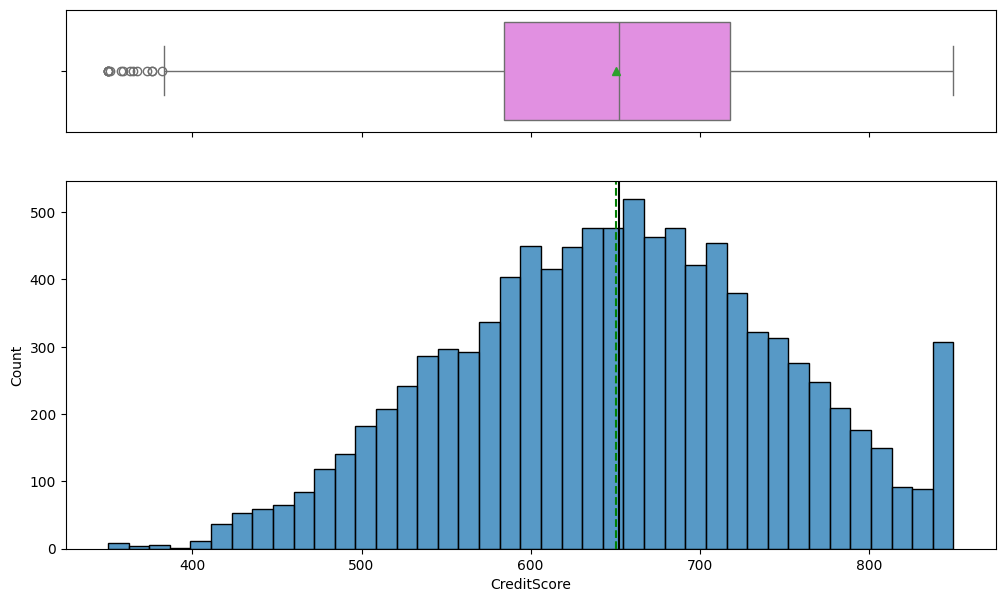

In [15]:
histogram_boxplot(ds,'CreditScore')

#### Observations on Age

*   Few outliers after age 60
*   Mean age is around 38 years




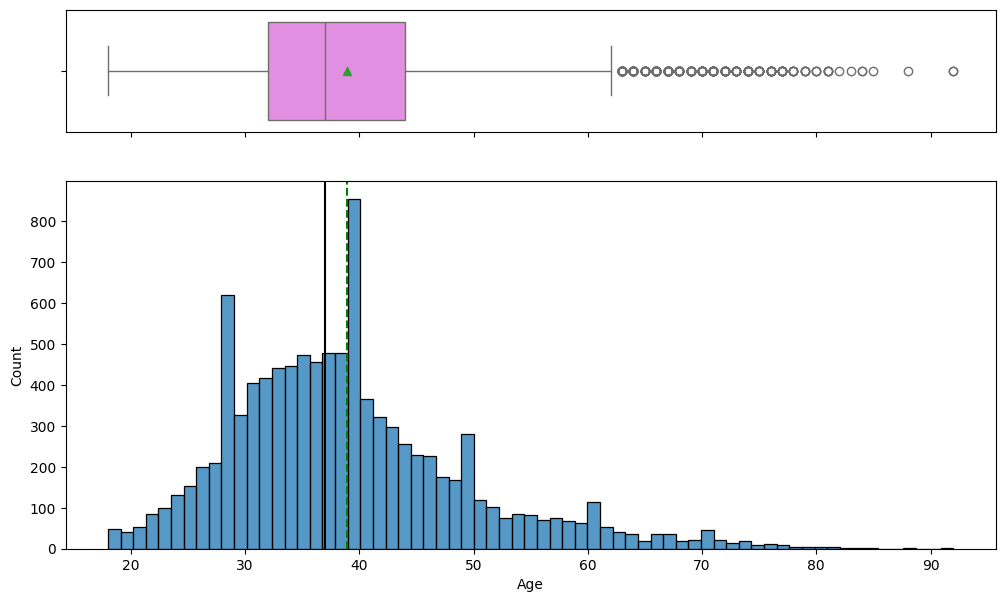

In [16]:
histogram_boxplot(ds, 'Age')          ## Complete the code to create histogram_boxplot for Age

#### Observations on Balance

*   Mean balance is around $98k
*   Distribution is left skewed



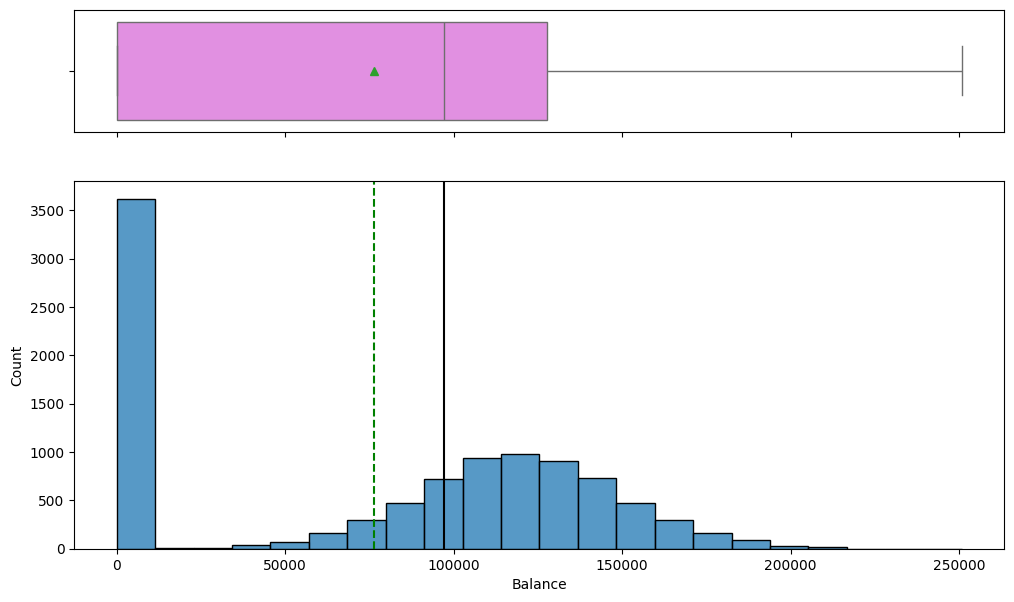

In [17]:
histogram_boxplot(ds, 'Balance')          ## Complete the code to create histogram_boxplot for Balance

#### Observations on Estimated Salary

*   Ranges from 0 to $250k
*   Mean is $100k



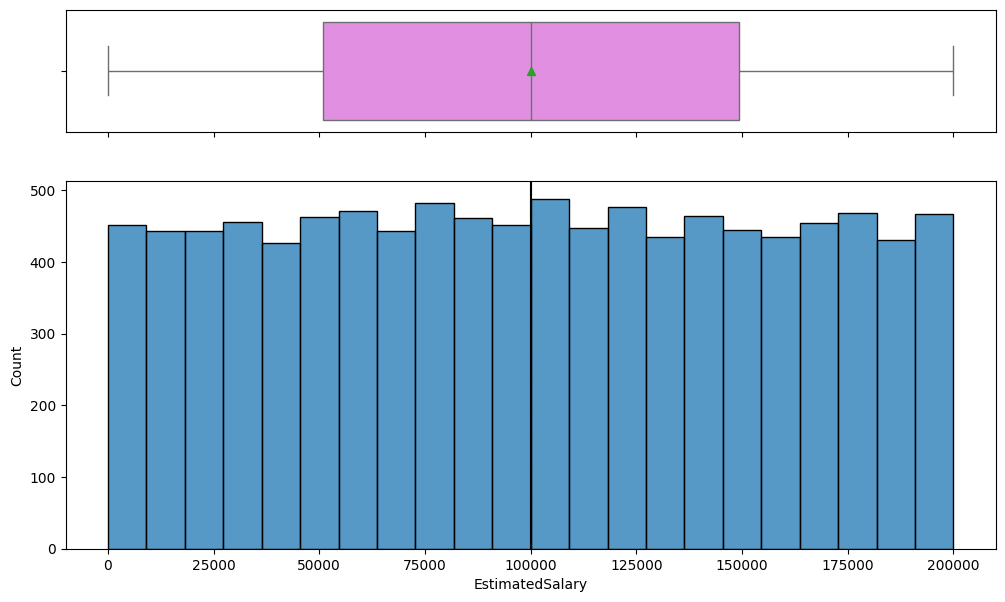

In [18]:
histogram_boxplot(ds, 'EstimatedSalary')

#### Observations on Exited

*   79.6% remains with bank and 20.4% left to join anotherv service provider


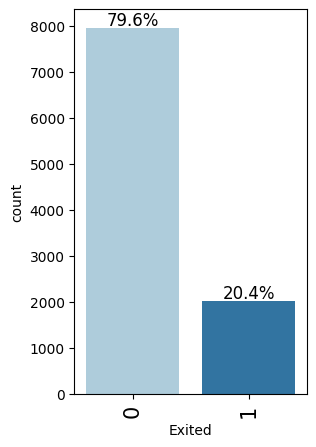

In [19]:
labeled_barplot(ds, "Exited", perc=True)

#### Observations on Geography

*   France have the highest percent(50.1%) of customers folloed by Germany and Spain




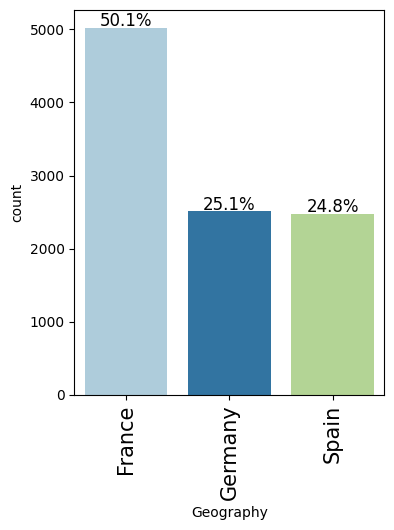

In [20]:
labeled_barplot(ds, 'Geography',  perc=True)

#### Observations on Gender

1.   54.6% customers are male and 45.4% are female

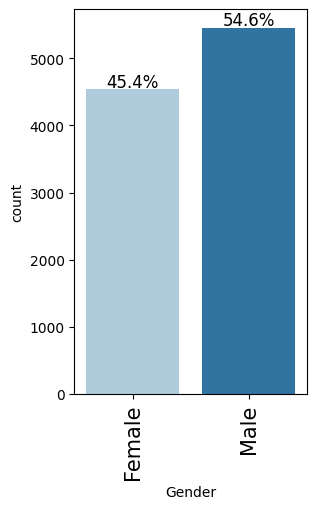

In [21]:
labeled_barplot(ds,'Gender',  perc=True)

#### Observations on Tenure

*   Highest percentage is for 2 years
*   Lowest percent is for less than a year



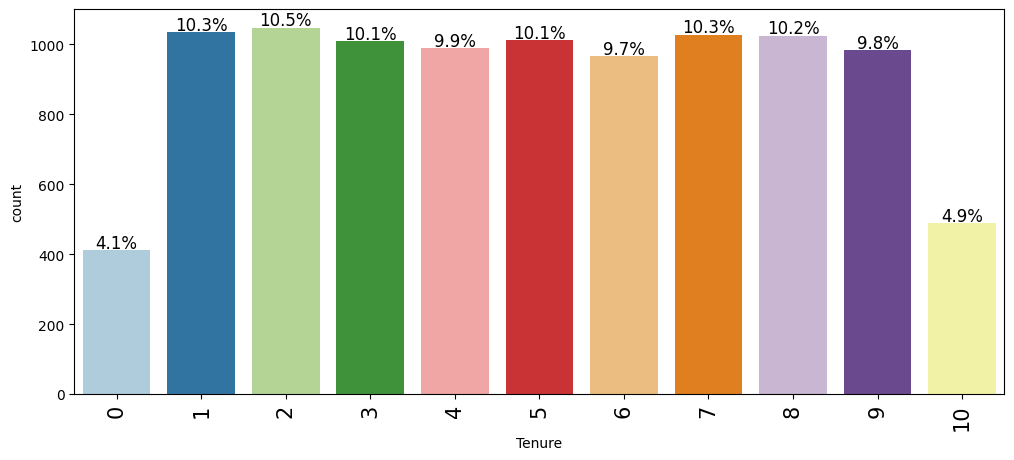

In [22]:
labeled_barplot(ds, 'Tenure',  perc=True)

#### Observations on Number of Products

*  50.8% customers holds single product
*  0.4% customers hold 4 products



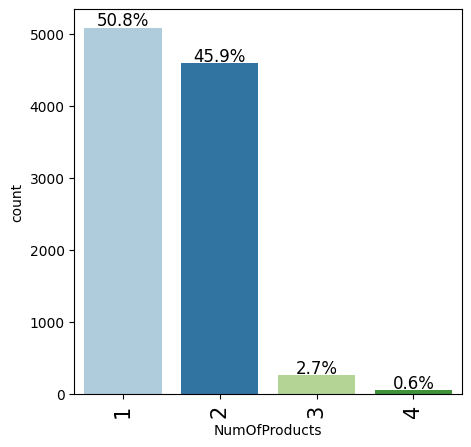

In [23]:
labeled_barplot(ds,'NumOfProducts', perc=True)

#### Observations on Has Credit Card

*   29.4% have credit card and 70.5% not having a credit card

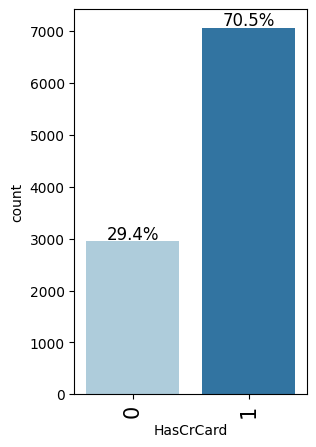

In [24]:
labeled_barplot(ds, 'HasCrCard', perc=True)

#### Observations on Is Active Member

*   48.5% of the customers are active members and 51.5% are not active members



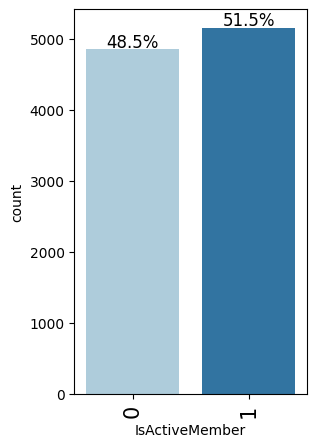

In [25]:
labeled_barplot(ds, 'IsActiveMember', perc=True)

### Bivariate Analysis

In [26]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

*   Not finding any strong correlation between variables




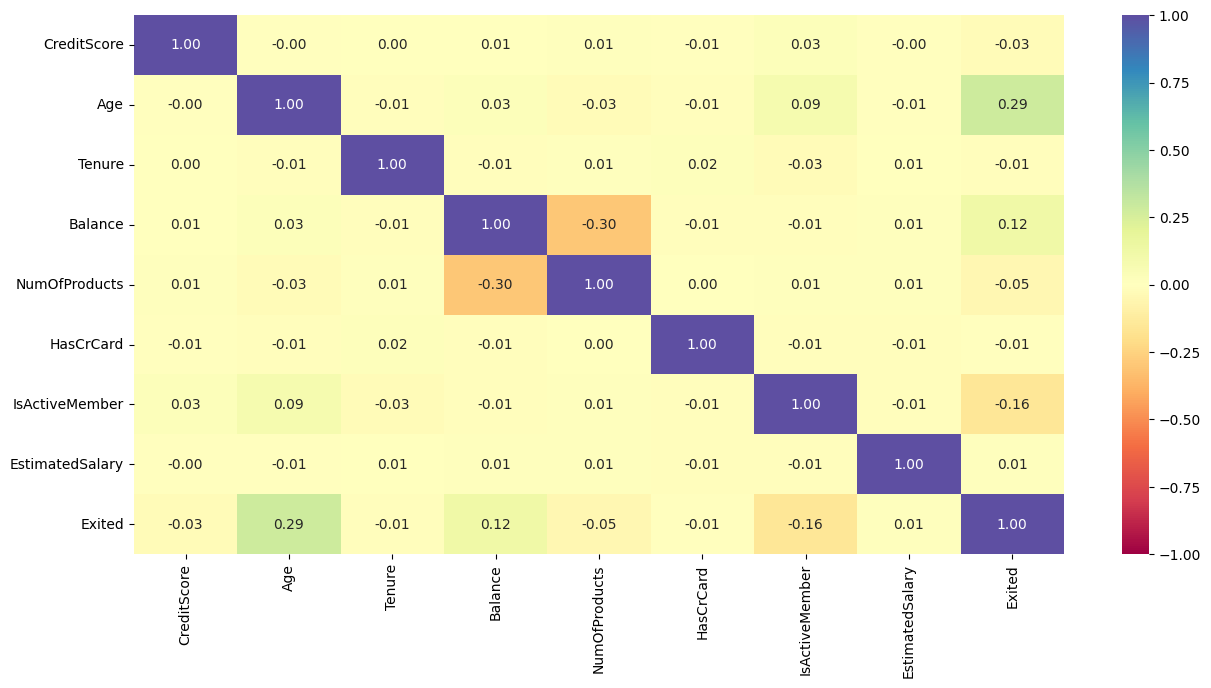

In [27]:
#TO-DO
ds1= ds.copy()
ds1.drop("Geography",axis=1, inplace=True)
ds1.drop("Gender",axis=1, inplace=True)

plt.figure(figsize=(15, 7))
sns.heatmap(ds1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Exited Vs Geography

*   Germany have the higest number of customers exited(814)
*  



Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


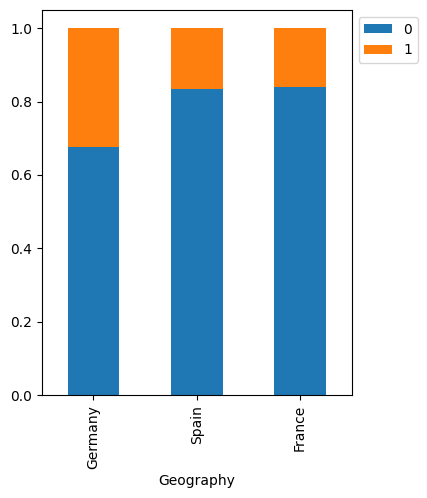

In [28]:
stacked_barplot(ds, "Geography", "Exited")

#### Exited Vs Gender

*   Number of female customers exited(1139) is more than male customers(898) exited

Gender  Female  Male    All
Exited                     
All       4543  5457  10000
0         3404  4559   7963
1         1139   898   2037
------------------------------------------------------------------------------------------------------------------------


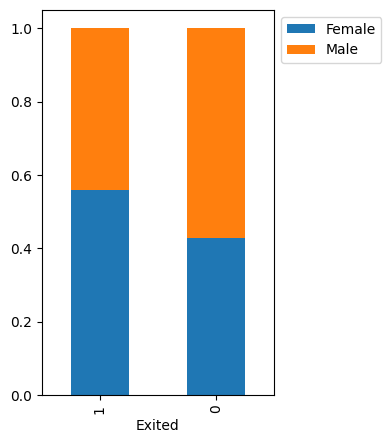

In [29]:
stacked_barplot(ds, 'Exited','Gender')

#### Exited Vs Has Credit Card

*  Percentage of customers exited having card and not having are almost same


HasCrCard     0     1    All
Exited                      
All        2945  7055  10000
0          2332  5631   7963
1           613  1424   2037
------------------------------------------------------------------------------------------------------------------------


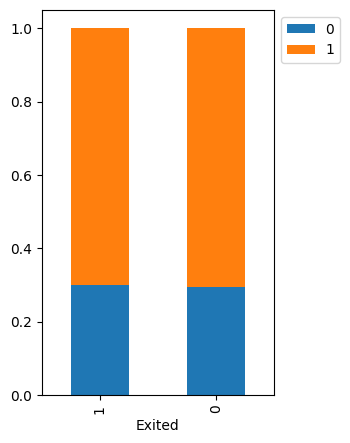

In [30]:
stacked_barplot(ds, 'Exited', 'HasCrCard')

#### Exited Vs Is active member

*   Less number of active members exited the bank


IsActiveMember     0     1    All
Exited                           
All             4849  5151  10000
0               3547  4416   7963
1               1302   735   2037
------------------------------------------------------------------------------------------------------------------------


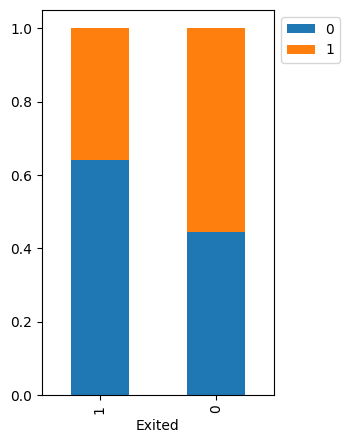

In [31]:
stacked_barplot(ds,'Exited', 'IsActiveMember')

#### Exited Vs Credit Score

*   Exited customer's data have outliers at the lower credit score end
*   Mean creditscore is slightly lower foir exited customers



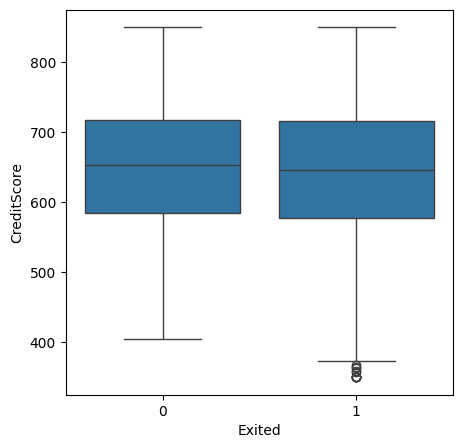

In [32]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

*   There are high number of outliers after age 55 who still continue with bank
*   Mean age of customers exited is around 48 where as custoners not exited mean age is 35



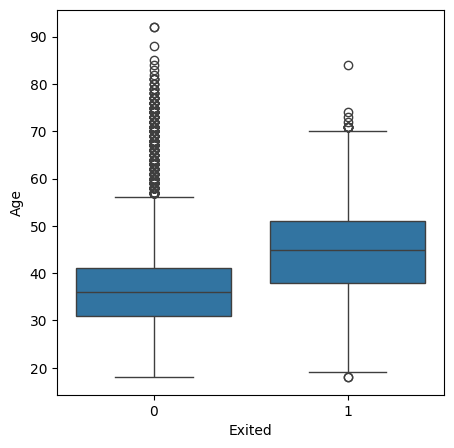

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

#### Exited Vs Tenure

*   IQR of exited customers tenure is between 2 years and 8 years
*   Mean tenure for exited and non exited customers is 5 years



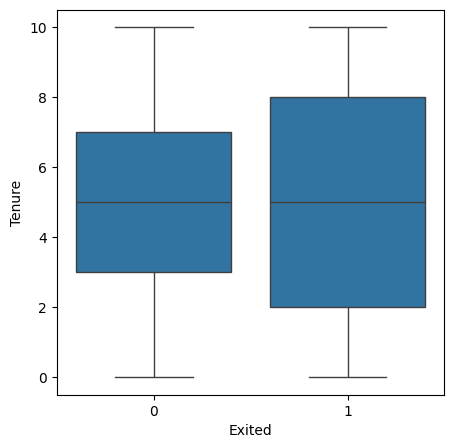

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

#### Exited Vs Balance

*   Exited customers mean balance is slightly higher than non exited



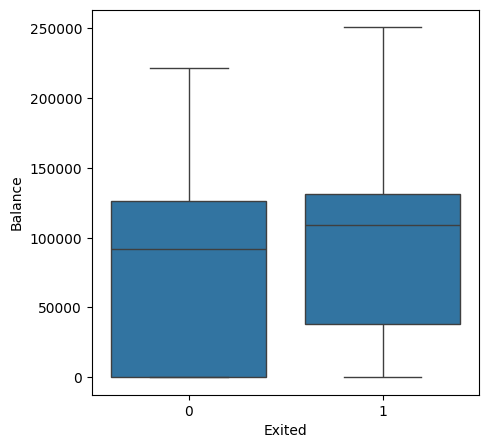

In [35]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

#### Exited Vs Number of Products

*  Number of products hold by a customer is almost similar for exited and non exited customers




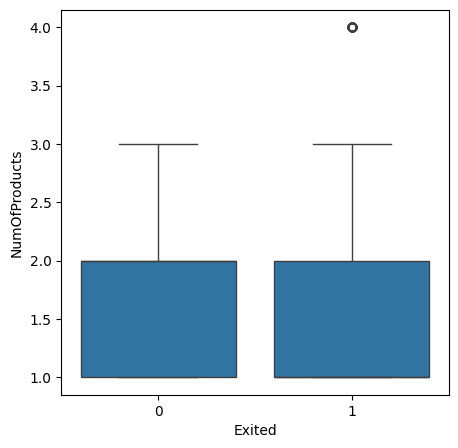

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

#### Exited Vs Estimated Salary

*  Mean exstimated salary of exited and non exited customers is around $100k



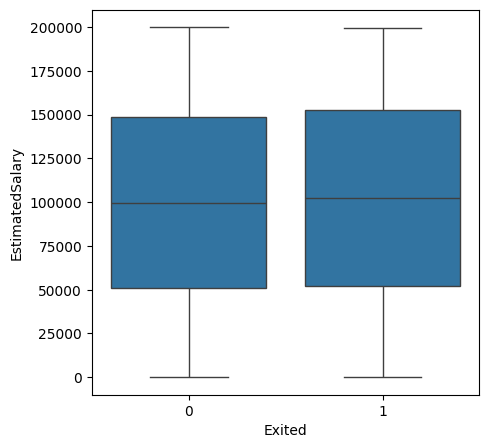

In [37]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Estimated Salary
plt.show()

## Data Preprocessing

### Train-validation-test Split

In [38]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [39]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42,stratify=y,shuffle = True)

In [40]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.3, random_state = 42,stratify=y_large, shuffle = True)

In [41]:
print(X_train.shape, X_val.shape, X_test.shape)

(6300, 10) (2700, 10) (1000, 10)


In [42]:
print(y_train.shape, y_val.shape, y_test.shape)

(6300,) (2700,) (1000,)


### Dummy Variable Creation

In [43]:
# Encoding Geography variable in train, test and validation set
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)

### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [44]:
# defining the list of columns to normalize
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# creating an instance of the standard scaler
sc = StandardScaler()
#Column list to normalize
X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

The model should predict the customers who is going to churn correctly. As we are concerned about True positives here Recall might be a good metric for evaluation.


**Let's create a function for plotting the confusion matrix**



In [45]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [46]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [47]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [48]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Complete the code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [49]:
#Complete the code to use SGD as the optimizer.

optimizer = tf.keras.optimizers.SGD(0.001)
metric = keras.metrics.Recall()
# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'

# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [50]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=[metric])

In [51]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# Fitting the ANN

from keras import backend as K
X_train = K.cast_to_floatx(X_train)
y_train = K.cast_to_floatx(y_train)
X_val=K.cast_to_floatx(X_val)
y_val=K.cast_to_floatx(y_val)

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=700,
    validation_data=(X_val,y_val),
    epochs=40,
    verbose=1
)

Epoch 1/40
9/9 [==============================] - 1s 35ms/step - loss: 0.6523 - recall: 0.1902 - val_loss: 0.6502 - val_recall: 0.1582
Epoch 2/40
9/9 [==============================] - 0s 8ms/step - loss: 0.6478 - recall: 0.1785 - val_loss: 0.6458 - val_recall: 0.1473
Epoch 3/40
9/9 [==============================] - 0s 9ms/step - loss: 0.6434 - recall: 0.1660 - val_loss: 0.6416 - val_recall: 0.1327
Epoch 4/40
9/9 [==============================] - 0s 9ms/step - loss: 0.6392 - recall: 0.1426 - val_loss: 0.6375 - val_recall: 0.1200
Epoch 5/40
9/9 [==============================] - 0s 8ms/step - loss: 0.6351 - recall: 0.1302 - val_loss: 0.6336 - val_recall: 0.1091
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 0.6312 - recall: 0.1122 - val_loss: 0.6297 - val_recall: 0.1000
Epoch 7/40
9/9 [==============================] - 0s 10ms/step - loss: 0.6273 - recall: 0.0966 - val_loss: 0.6260 - val_recall: 0.0855
Epoch 8/40
9/9 [==============================] - 0s 7ms/ste

**Loss function**

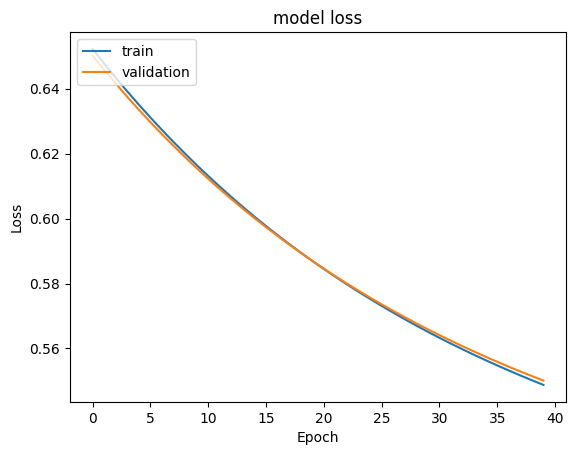

In [53]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

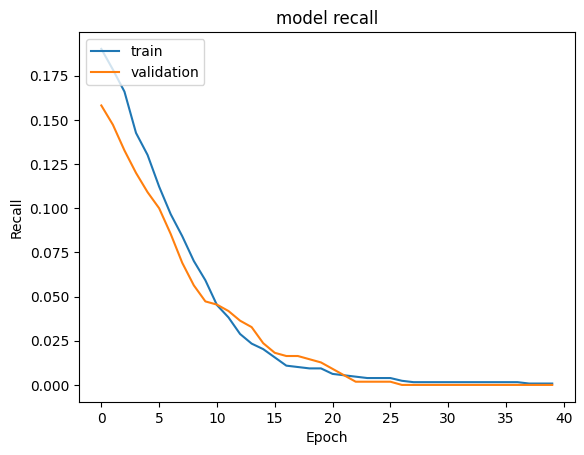

In [54]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [55]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

197/197 [==============================] - 0s 885us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [56]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 875us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [57]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [58]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      5017
         1.0       0.14      0.00      0.00      1283

    accuracy                           0.80      6300
   macro avg       0.47      0.50      0.44      6300
weighted avg       0.66      0.80      0.71      6300



In [59]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      2150
         1.0       0.00      0.00      0.00       550

    accuracy                           0.80      2700
   macro avg       0.40      0.50      0.44      2700
weighted avg       0.63      0.80      0.71      2700



**Confusion matrix**

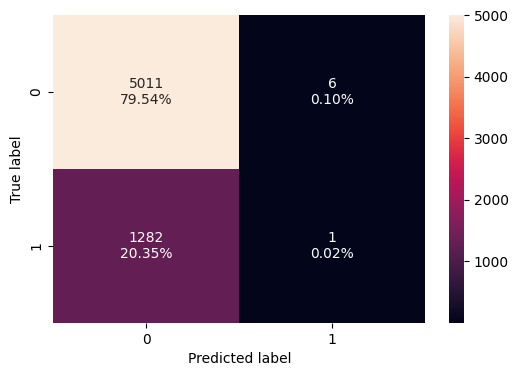

In [60]:
make_confusion_matrix(y_train, y_train_pred)

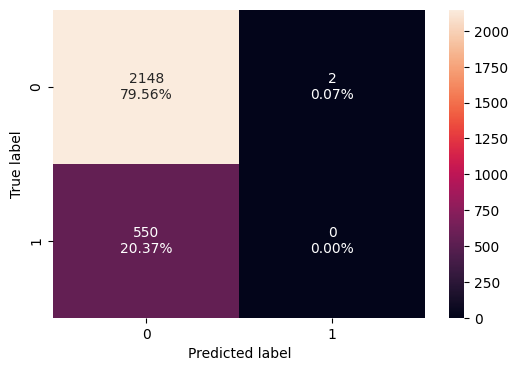

In [61]:
make_confusion_matrix(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [62]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [63]:
#Initializing the neural network
model_1 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(18,activation='relu'))
#Complete the code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [64]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.Recall()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'

# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [65]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [66]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 18)                594       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 997 (3.89 KB)
Trainable params: 997 (3.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=64, ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=25, ## Complete the code to specify the number of epochs
    verbose=1
)

Epoch 1/25
99/99 [==============================] - 1s 4ms/step - loss: 0.5415 - recall: 0.1231 - val_loss: 0.4562 - val_recall: 0.0073
Epoch 2/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4440 - recall: 0.0655 - val_loss: 0.4388 - val_recall: 0.1382
Epoch 3/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4278 - recall: 0.1972 - val_loss: 0.4317 - val_recall: 0.2018
Epoch 4/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4196 - recall: 0.2346 - val_loss: 0.4274 - val_recall: 0.2145
Epoch 5/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4128 - recall: 0.2595 - val_loss: 0.4220 - val_recall: 0.3236
Epoch 6/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4076 - recall: 0.2970 - val_loss: 0.4191 - val_recall: 0.2491
Epoch 7/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4014 - recall: 0.3016 - val_loss: 0.4156 - val_recall: 0.3018
Epoch 8/25
99/99 [==============================

**Loss function**

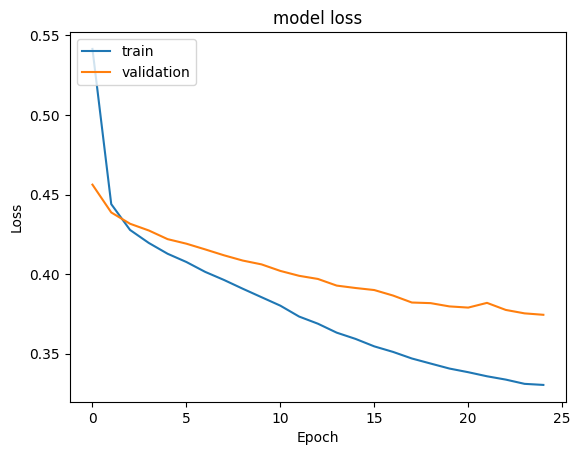

In [68]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

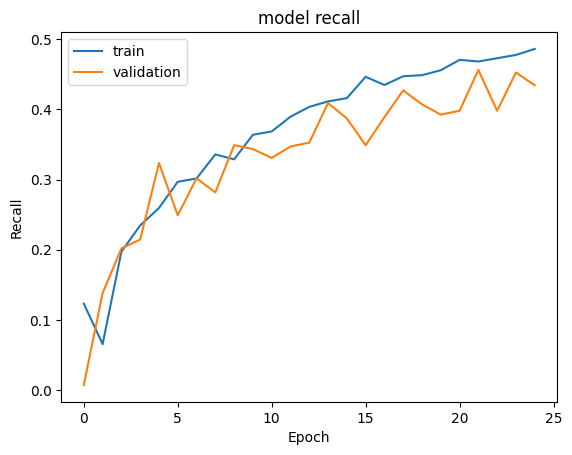

In [69]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [70]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

197/197 [==============================] - 0s 876us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [71]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 887us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [72]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [73]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      5017
         1.0       0.78      0.50      0.61      1283

    accuracy                           0.87      6300
   macro avg       0.83      0.73      0.76      6300
weighted avg       0.86      0.87      0.86      6300



In [74]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      2150
         1.0       0.66      0.43      0.52       550

    accuracy                           0.84      2700
   macro avg       0.76      0.69      0.71      2700
weighted avg       0.83      0.84      0.83      2700



**Confusion matrix**

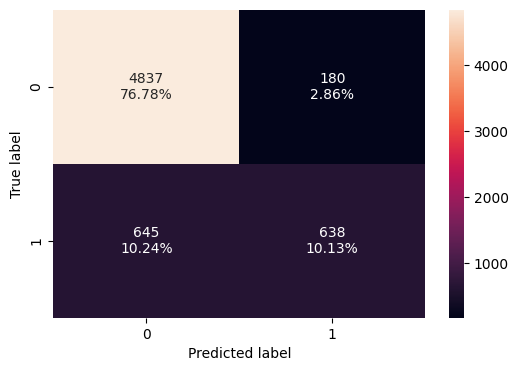

In [75]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

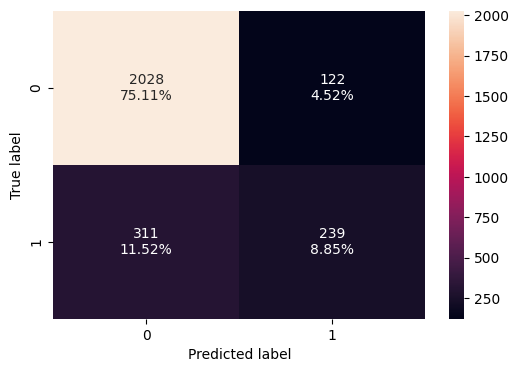

In [76]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Adam Optimizer and Dropout

In [77]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [78]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(20,activation='relu'))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(15,activation='relu'))
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(10,activation='relu'))
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [79]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.Recall()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [80]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [81]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
 dense_2 (Dense)             (None, 15)                315       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                160       
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [82]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=64,  ##Complete the code to specify the batch size.
    epochs=25, ##Complete the code to specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/25
99/99 [==============================] - 1s 4ms/step - loss: 0.5629 - recall: 0.0857 - val_loss: 0.4619 - val_recall: 0.0000e+00
Epoch 2/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4540 - recall: 0.0000e+00 - val_loss: 0.4416 - val_recall: 0.0000e+00
Epoch 3/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4421 - recall: 0.0000e+00 - val_loss: 0.4343 - val_recall: 0.0000e+00
Epoch 4/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4367 - recall: 0.0000e+00 - val_loss: 0.4292 - val_recall: 0.0000e+00
Epoch 5/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4319 - recall: 0.0078 - val_loss: 0.4267 - val_recall: 0.0491
Epoch 6/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4274 - recall: 0.1208 - val_loss: 0.4217 - val_recall: 0.2291
Epoch 7/25
99/99 [==============================] - 0s 2ms/step - loss: 0.4191 - recall: 0.2042 - val_loss: 0.4168 - val_recall: 0.2582
Epoch 8/25
99/99 [==

**Loss function**

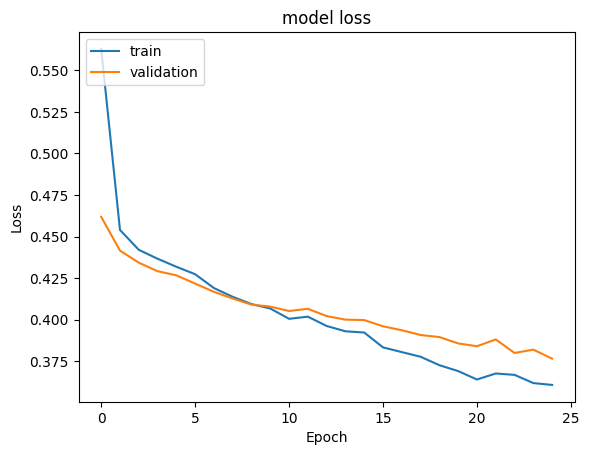

In [83]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

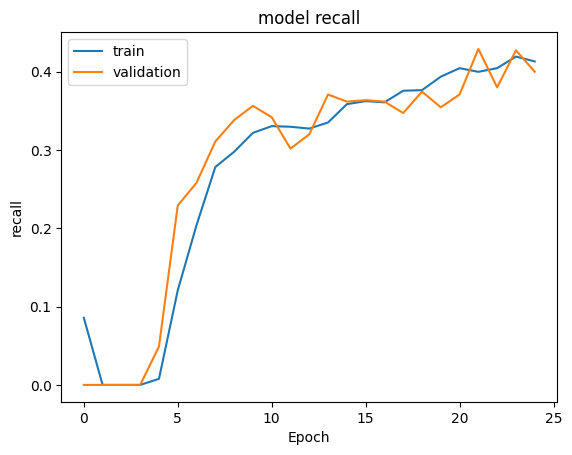

In [84]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [85]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

197/197 [==============================] - 0s 968us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [86]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 927us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [87]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [88]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      5017
         1.0       0.80      0.46      0.58      1283

    accuracy                           0.87      6300
   macro avg       0.84      0.71      0.75      6300
weighted avg       0.86      0.87      0.85      6300



In [89]:
#classification report
cr = classification_report(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      2150
         1.0       0.71      0.40      0.51       550

    accuracy                           0.84      2700
   macro avg       0.79      0.68      0.71      2700
weighted avg       0.83      0.84      0.83      2700



**Confusion matrix**

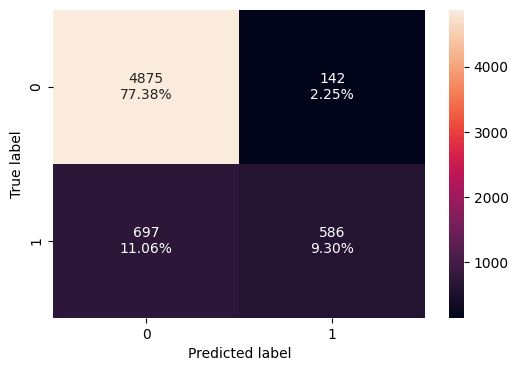

In [90]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

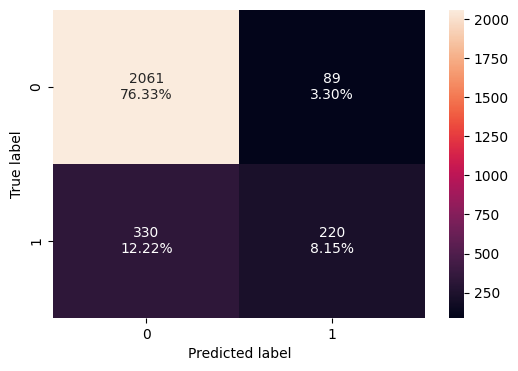

In [91]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [92]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10034, 11)
After UpSampling, the shape of train_y: (10034,) 



Let's build a model with the balanced dataset

In [93]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [94]:
#Initializing the model
model_3 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [95]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)
metric = keras.metrics.Recall()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [96]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [97]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=64, ## Complete the code to specify the batch size to use
    epochs=25, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/25
157/157 [==============================] - 1s 2ms/step - loss: 0.7017 - recall: 0.9476 - val_loss: 0.7428 - val_recall: 0.9473
Epoch 2/25
157/157 [==============================] - 0s 2ms/step - loss: 0.6999 - recall: 0.9424 - val_loss: 0.7371 - val_recall: 0.9418
Epoch 3/25
157/157 [==============================] - 0s 2ms/step - loss: 0.6983 - recall: 0.9372 - val_loss: 0.7319 - val_recall: 0.9382
Epoch 4/25
157/157 [==============================] - 0s 2ms/step - loss: 0.6969 - recall: 0.9282 - val_loss: 0.7271 - val_recall: 0.9345
Epoch 5/25
157/157 [==============================] - 0s 2ms/step - loss: 0.6955 - recall: 0.9193 - val_loss: 0.7228 - val_recall: 0.9182
Epoch 6/25
157/157 [==============================] - 0s 2ms/step - loss: 0.6943 - recall: 0.9079 - val_loss: 0.7187 - val_recall: 0.9036
Epoch 7/25
157/157 [==============================] - 0s 2ms/step - loss: 0.6930 - recall: 0.8904 - val_loss: 0.7145 - val_recall: 0.8855
Epoch 8/25
157/157 [==============

**Loss function**

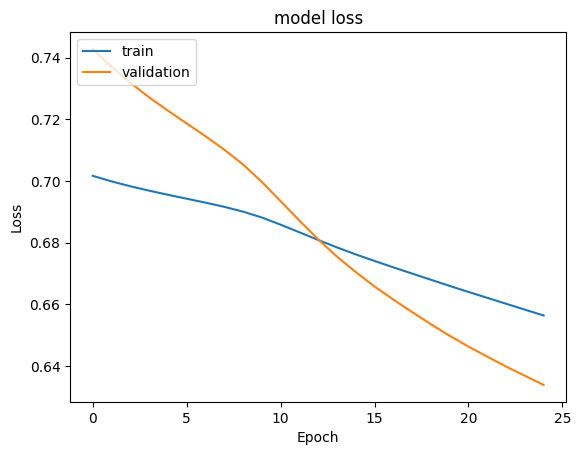

In [99]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

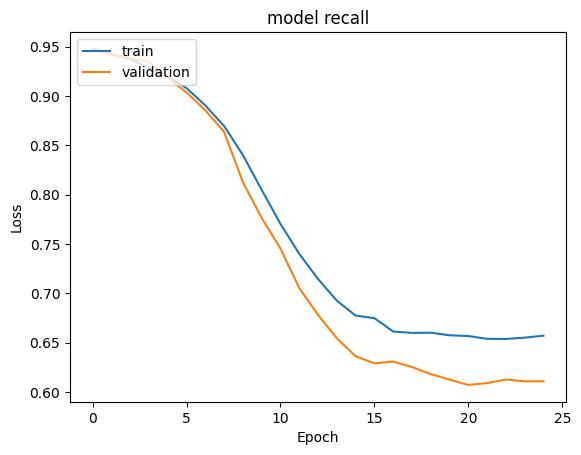

In [100]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [101]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

314/314 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [102]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [103]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [104]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64      5017
         1.0       0.64      0.65      0.65      5017

    accuracy                           0.64     10034
   macro avg       0.64      0.64      0.64     10034
weighted avg       0.64      0.64      0.64     10034



In [105]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.86      0.63      0.73      2150
         1.0       0.30      0.61      0.40       550

    accuracy                           0.63      2700
   macro avg       0.58      0.62      0.57      2700
weighted avg       0.75      0.63      0.66      2700



**Confusion matrix**

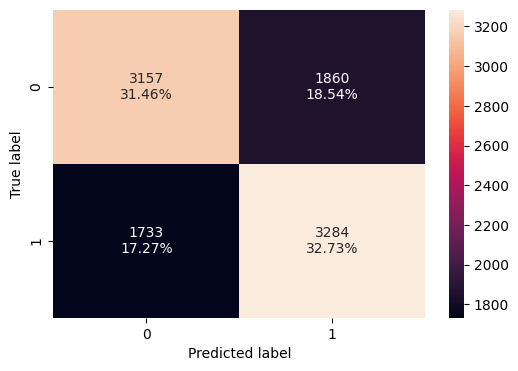

In [106]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

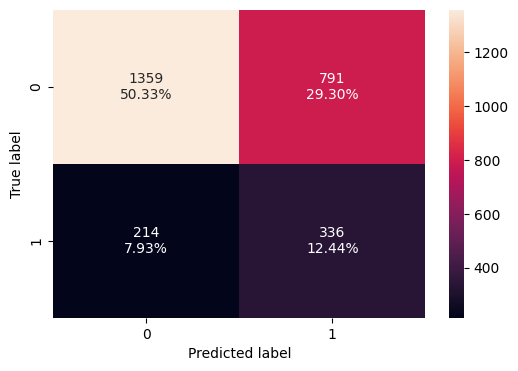

In [107]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [108]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [109]:
#Initializing the model
model_4 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [110]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.Recall()
# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [112]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [113]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=64, ## Complete the code to specify the batch size to use
    epochs=25,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/25
157/157 [==============================] - 2s 3ms/step - loss: 0.6222 - recall: 0.7152 - val_loss: 0.5927 - val_recall: 0.7164
Epoch 2/25
157/157 [==============================] - 0s 2ms/step - loss: 0.5573 - recall: 0.7351 - val_loss: 0.5701 - val_recall: 0.6982
Epoch 3/25
157/157 [==============================] - 0s 2ms/step - loss: 0.5408 - recall: 0.7467 - val_loss: 0.5446 - val_recall: 0.6836
Epoch 4/25
157/157 [==============================] - 0s 2ms/step - loss: 0.5210 - recall: 0.7610 - val_loss: 0.5069 - val_recall: 0.6691
Epoch 5/25
157/157 [==============================] - 0s 2ms/step - loss: 0.4979 - recall: 0.7714 - val_loss: 0.4933 - val_recall: 0.6800
Epoch 6/25
157/157 [==============================] - 0s 2ms/step - loss: 0.4765 - recall: 0.7891 - val_loss: 0.4674 - val_recall: 0.6782
Epoch 7/25
157/157 [==============================] - 0s 2ms/step - loss: 0.4595 - recall: 0.7893 - val_loss: 0.4904 - val_recall: 0.7164
Epoch 8/25
157/157 [==============

**Loss function**

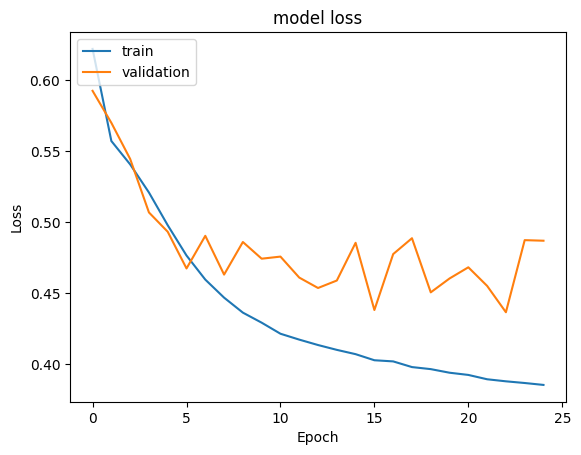

In [115]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

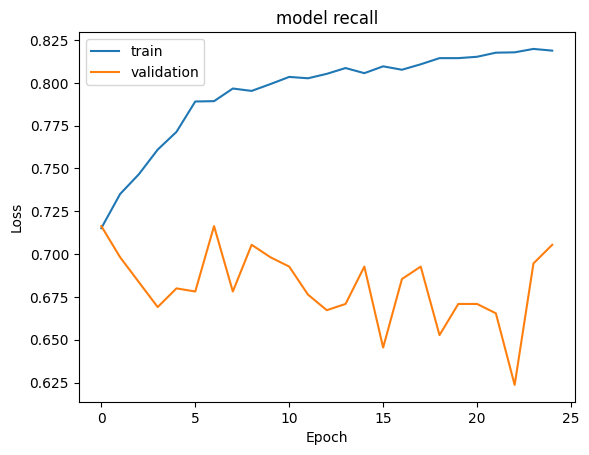

In [116]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [117]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

314/314 [==============================] - 0s 873us/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [118]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

85/85 [==============================] - 0s 878us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [119]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [120]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      5017
         1.0       0.82      0.84      0.83      5017

    accuracy                           0.83     10034
   macro avg       0.83      0.83      0.83     10034
weighted avg       0.83      0.83      0.83     10034



In [121]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      2150
         1.0       0.47      0.71      0.56       550

    accuracy                           0.78      2700
   macro avg       0.69      0.75      0.71      2700
weighted avg       0.82      0.78      0.79      2700



**Confusion matrix**

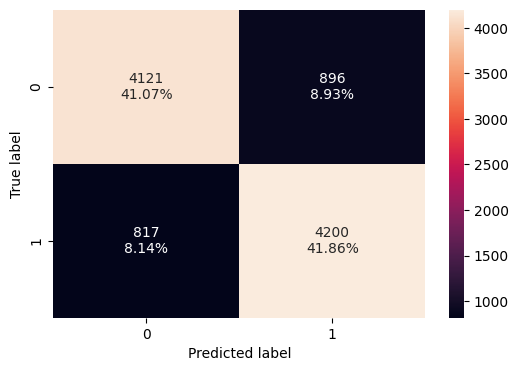

In [122]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

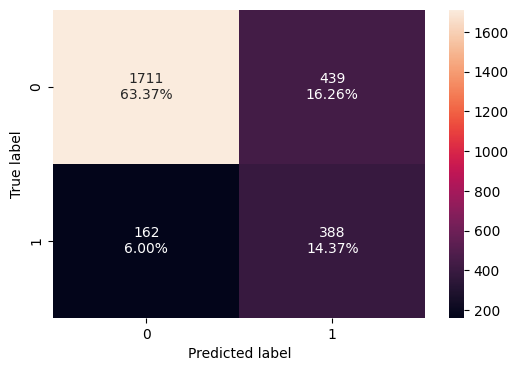

In [123]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [124]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [125]:
#Initializing the model
model_5 = Sequential()
# Complete the code to add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model_5.add(Dropout(0.2))
# Complete the code to add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(16,activation='relu'))
# Complete the code to add dropout rate.
model_5.add(Dropout(0.1))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [126]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.Recall()
# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [127]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [128]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [129]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=64, ## Complete the code to specify the batch size to use
    epochs=25, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/25
157/157 [==============================] - 1s 4ms/step - loss: 0.6436 - recall: 0.6833 - val_loss: 0.5732 - val_recall: 0.6691
Epoch 2/25
157/157 [==============================] - 0s 2ms/step - loss: 0.5842 - recall: 0.7158 - val_loss: 0.5605 - val_recall: 0.6782
Epoch 3/25
157/157 [==============================] - 0s 3ms/step - loss: 0.5723 - recall: 0.7211 - val_loss: 0.5455 - val_recall: 0.6727
Epoch 4/25
157/157 [==============================] - 0s 3ms/step - loss: 0.5614 - recall: 0.7359 - val_loss: 0.5282 - val_recall: 0.6636
Epoch 5/25
157/157 [==============================] - 0s 2ms/step - loss: 0.5520 - recall: 0.7395 - val_loss: 0.5391 - val_recall: 0.6764
Epoch 6/25
157/157 [==============================] - 0s 2ms/step - loss: 0.5473 - recall: 0.7451 - val_loss: 0.5239 - val_recall: 0.6782
Epoch 7/25
157/157 [==============================] - 0s 2ms/step - loss: 0.5359 - recall: 0.7423 - val_loss: 0.5374 - val_recall: 0.6964
Epoch 8/25
157/157 [==============

**Loss function**

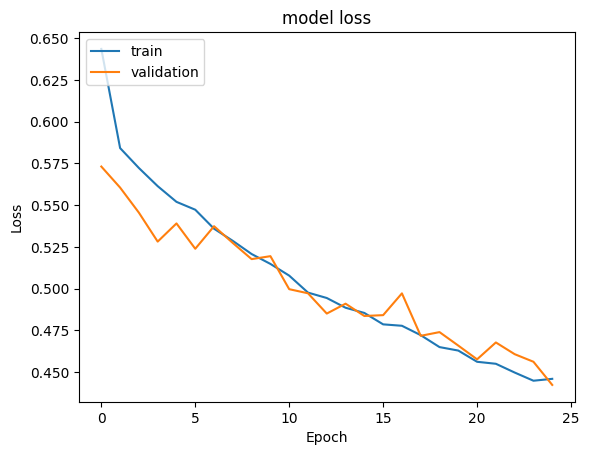

In [130]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

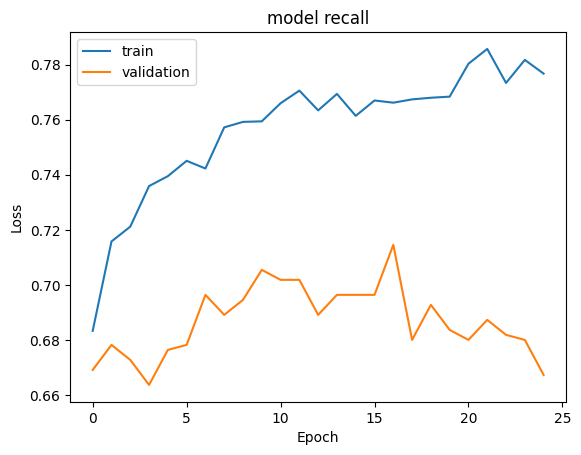

In [131]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [132]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

314/314 [==============================] - 0s 926us/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [133]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred


85/85 [==============================] - 0s 890us/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [134]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)


**Classification report**

In [135]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      5017
         1.0       0.84      0.78      0.81      5017

    accuracy                           0.82     10034
   macro avg       0.82      0.82      0.82     10034
weighted avg       0.82      0.82      0.82     10034



In [136]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87      2150
         1.0       0.52      0.67      0.58       550

    accuracy                           0.81      2700
   macro avg       0.71      0.75      0.73      2700
weighted avg       0.83      0.81      0.82      2700



**Confusion matrix**

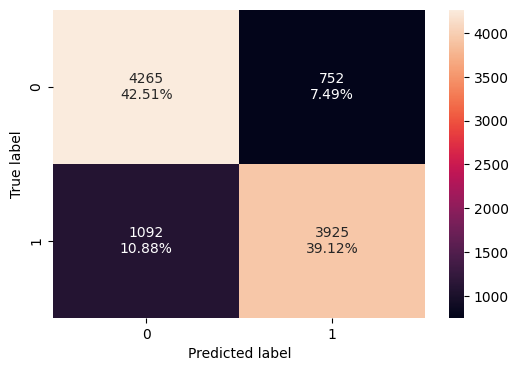

In [137]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

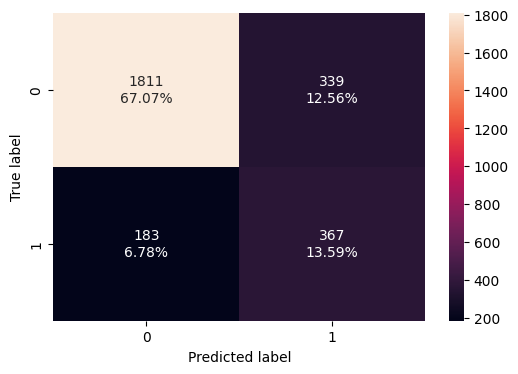

In [138]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

## Model Performance Comparison and Final Model Selection

In [139]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.000779
NN with Adam,0.497272
NN with Adam & Dropout,0.456742
NN with SMOTE & SGD,0.654574
NN with SMOTE & Adam,0.837154
"NN with SMOTE,Adam & Dropout",0.782340


In [140]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.000000
NN with Adam,0.434545
NN with Adam & Dropout,0.400000
NN with SMOTE & SGD,0.610909
NN with SMOTE & Adam,0.705455
"NN with SMOTE,Adam & Dropout",0.667273


In [141]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.000779
NN with Adam,0.062727
NN with Adam & Dropout,0.056742
NN with SMOTE & SGD,0.043665
NN with SMOTE & Adam,0.131699
"NN with SMOTE,Adam & Dropout",0.115067


### Obseravtions

*   None of the models have adequate recall scores. For NN with SMOTE & SGD, train and validation set recall scores are closer than other models. Hence choosing model_3 for test validation

In [151]:
X_test = np.asarray(X_test).astype(np.float32)
y_test_pred = model_3.predict(X_test)  ## Complete the code to specify the best model
#y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

32/32 [==============================] - 0s 1ms/step
[[0.48578468]
 [0.35693493]
 [0.56291443]
 [0.35945457]
 [0.5519153 ]
 [0.5423148 ]
 [0.46504724]
 [0.4041661 ]
 [0.5467495 ]
 [0.4761767 ]
 [0.48105702]
 [0.3453455 ]
 [0.5247715 ]
 [0.48562855]
 [0.30796003]
 [0.5534903 ]
 [0.508828  ]
 [0.52923554]
 [0.5191955 ]
 [0.5305516 ]
 [0.44852686]
 [0.5593993 ]
 [0.53905225]
 [0.27686545]
 [0.5159154 ]
 [0.4027077 ]
 [0.4625173 ]
 [0.44941393]
 [0.3375034 ]
 [0.33209556]
 [0.43451267]
 [0.4982268 ]
 [0.4276686 ]
 [0.50354695]
 [0.46451   ]
 [0.34121934]
 [0.35513404]
 [0.313933  ]
 [0.40651762]
 [0.5230907 ]
 [0.5717996 ]
 [0.36487263]
 [0.3856642 ]
 [0.5466267 ]
 [0.52248293]
 [0.522873  ]
 [0.519503  ]
 [0.4406737 ]
 [0.55850095]
 [0.542629  ]
 [0.5232308 ]
 [0.5096957 ]
 [0.5433079 ]
 [0.53204733]
 [0.41068384]
 [0.50352955]
 [0.527703  ]
 [0.41220346]
 [0.4614487 ]
 [0.53329945]
 [0.48265097]
 [0.4235012 ]
 [0.5068315 ]
 [0.49395072]
 [0.3089428 ]
 [0.522587  ]
 [0.44905883]
 [0.32684

In [153]:
#lets print classification report
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)


Classification Report - Test data

              precision    recall  f1-score   support

           0       0.86      0.61      0.72       796
           1       0.29      0.60      0.39       204

    accuracy                           0.61      1000
   macro avg       0.57      0.61      0.55      1000
weighted avg       0.74      0.61      0.65      1000



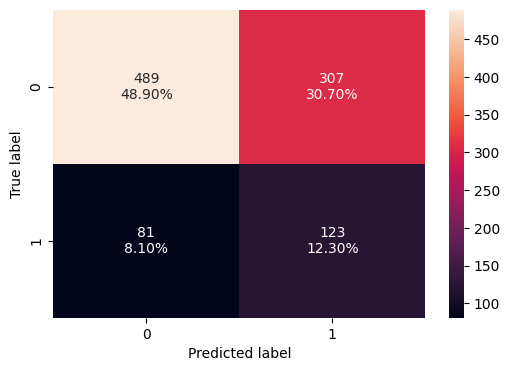

In [155]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred>0.5)

## Actionable Insights

*   The best model was accurately able to predict 50% of test data which is
    not adequate
*   70.5% exited customers not having a credit card
*   Germany have the highest number of customers exited
*   The age distribution of churned and retained bank customers is fairly   alike, spanning from 30 to 50 years. However, retained customers predominantly fall within the 30 to 40 years age bracket.
*   Non-active bank customers display a higher churn rate compared to active members, standing at 13%.
*   Female bank customers exhibit a higher churn rate at 11.4%, whereas males demonstrate a lower churn rate at 9%.
*   Exited customers mean balance is slightly higher than non exited
*   IQR of exited customers tenure is between 2 years and 8 years
*   Mean creditscore is slightly lower foir exited customers
*   Less number of active members exited the bank




### Business Recommendations

*   Encourage customers to take advantage of enticing marketing offers to
    acquire additional credit cards from the bank.
*   Offer promotions to boost customer engagement and prevent churn
*   Execute targeted customer promotions in Germany to minimize churn rates
*   Marketing initiatives aimed at retaining female customers within the bank.

*   Raise the credit limits for customers with low credit scores to help improve their credit ratings.










<font size=6 color='blue'>Power Ahead</font>
___